In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('./Car_sales.csv',parse_dates=['Latest_Launch'])
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         157 non-null    object        
 1   Model                157 non-null    object        
 2   Sales_in_thousands   157 non-null    float64       
 3   __year_resale_value  121 non-null    float64       
 4   Vehicle_type         157 non-null    object        
 5   Price_in_thousands   155 non-null    float64       
 6   Engine_size          156 non-null    float64       
 7   Horsepower           156 non-null    float64       
 8   Wheelbase            156 non-null    float64       
 9   Width                156 non-null    float64       
 10  Length               156 non-null    float64       
 11  Curb_weight          155 non-null    float64       
 12  Fuel_capacity        156 non-null    float64       
 13  Fuel_efficiency      154 non-null  

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [8]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(117, 16)

In [ ]:
data.rename(columns={"__year_resale_value":"year_resale_value"},inplace=True)
data

In [11]:
data.sort_values(by='Latest_Launch',inplace=True)
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
90,Mercury,Mountaineer,27.609,20.430,Car,27.560,4.0,210.0,111.6,70.2,190.1,3.876,21.0,18.0,2008-02-13,85.949744
91,Mercury,Villager,20.380,14.795,Car,22.510,3.3,170.0,112.2,74.9,194.7,3.944,20.0,21.0,2009-10-20,69.671461
131,Saturn,SW,5.223,10.790,Passenger,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,2011-01-15,49.865774
145,Volkswagen,Golf,9.761,11.425,Passenger,14.900,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2011-01-24,46.943877
137,Toyota,Camry,247.994,13.245,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2011-02-10,54.372420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Mitsubishi,Eclipse,42.541,10.395,Passenger,19.047,2.4,154.0,100.8,68.9,175.4,2.910,15.9,24.0,2012-11-24,62.441962
119,Pontiac,Grand Am,131.097,10.290,Passenger,19.720,3.4,175.0,107.0,70.4,186.3,3.091,15.2,25.0,2012-11-26,70.389737
86,Mercury,Mystique,14.351,8.800,Passenger,16.240,2.0,125.0,106.5,69.1,184.8,2.769,15.0,28.0,2012-12-19,50.997748
125,Porsche,Carrera Coupe,1.280,60.625,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,2012-12-21,134.390975


In [12]:
data.reset_index(drop=True,inplace=True)
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Mercury,Mountaineer,27.609,20.430,Car,27.560,4.0,210.0,111.6,70.2,190.1,3.876,21.0,18.0,2008-02-13,85.949744
1,Mercury,Villager,20.380,14.795,Car,22.510,3.3,170.0,112.2,74.9,194.7,3.944,20.0,21.0,2009-10-20,69.671461
2,Saturn,SW,5.223,10.790,Passenger,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,2011-01-15,49.865774
3,Volkswagen,Golf,9.761,11.425,Passenger,14.900,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2011-01-24,46.943877
4,Toyota,Camry,247.994,13.245,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2011-02-10,54.372420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Mitsubishi,Eclipse,42.541,10.395,Passenger,19.047,2.4,154.0,100.8,68.9,175.4,2.910,15.9,24.0,2012-11-24,62.441962
113,Pontiac,Grand Am,131.097,10.290,Passenger,19.720,3.4,175.0,107.0,70.4,186.3,3.091,15.2,25.0,2012-11-26,70.389737
114,Mercury,Mystique,14.351,8.800,Passenger,16.240,2.0,125.0,106.5,69.1,184.8,2.769,15.0,28.0,2012-12-19,50.997748
115,Porsche,Carrera Coupe,1.280,60.625,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,2012-12-21,134.390975


### Extracting the dates

In [13]:
data["Year"]=data.Latest_Launch.dt.year
data["Month"]=data.Latest_Launch.dt.month
data["Day"]=data.Latest_Launch.dt.day

In [14]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Year,Month,Day
0,Mercury,Mountaineer,27.609,20.430,Car,27.560,4.0,210.0,111.6,70.2,190.1,3.876,21.0,18.0,2008-02-13,85.949744,2008,2,13
1,Mercury,Villager,20.380,14.795,Car,22.510,3.3,170.0,112.2,74.9,194.7,3.944,20.0,21.0,2009-10-20,69.671461,2009,10,20
2,Saturn,SW,5.223,10.790,Passenger,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,2011-01-15,49.865774,2011,1,15
3,Volkswagen,Golf,9.761,11.425,Passenger,14.900,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2011-01-24,46.943877,2011,1,24
4,Toyota,Camry,247.994,13.245,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2011-02-10,54.372420,2011,2,10


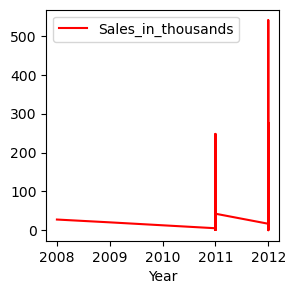

In [20]:
data.plot.line(x='Year',y='Sales_in_thousands',figsize=(3,3),cmap='prism');

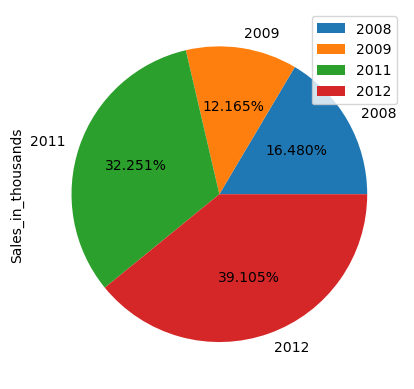

In [25]:
data.groupby(['Year'])['Sales_in_thousands'].mean().plot.pie(autopct='%1.3f%%',legend=True);

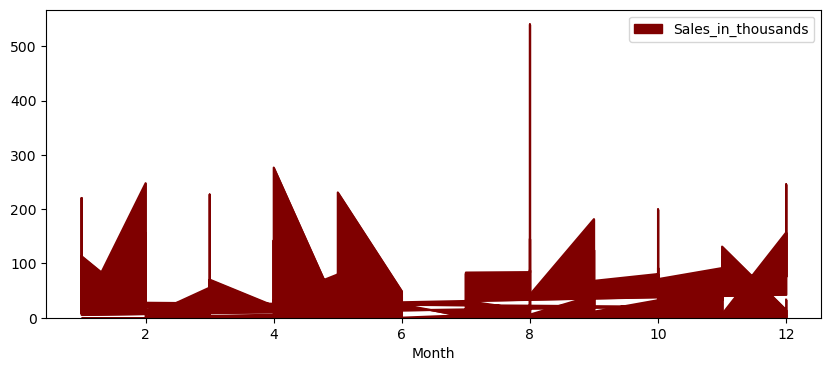

In [34]:
data.plot.area('Month','Sales_in_thousands',figsize=(10,4),cmap='OrRd_r');